In [1]:
import numpy as np
import functools
import time
from matplotlib import pyplot as plt
from sklearn import datasets

data = np.array([[1,5],
                [3,6],
                [4,2],
                [3,7],
                [5,8],
                [25,31],
                [27,33],
                [23,25],
                [31,28],
                [33,31],
                [55,54],
                [59,51],
                [63,65],
                [56,62],
                [61,61]])

data_1d = np.array([1,5,3,2,6,25,26,24,27,28,53,52,64,62,51])
print(data_1d.ndim)
print(data.ndim)
#data_1d = data_1d.reshape(-1,1)
stack = np.column_stack([data_1d.reshape(-1,1),np.zeros(np.shape(data_1d))])
stack

1
2


array([[ 1.,  0.],
       [ 5.,  0.],
       [ 3.,  0.],
       [ 2.,  0.],
       [ 6.,  0.],
       [25.,  0.],
       [26.,  0.],
       [24.,  0.],
       [27.,  0.],
       [28.,  0.],
       [53.,  0.],
       [52.,  0.],
       [64.,  0.],
       [62.,  0.],
       [51.,  0.]])

In [2]:
# def timer(func):
#     @functools.wraps(func)
#     def wrapper_timer(*args, **kwargs):
#         start = time.perf_counter()
#         #'value' is the function being timed
#         value = func(*args, **kwargs)
#         end = time.perf_counter()
#         print(f'Finished {func.__name__!r} in {end-start:.8f} seconds!')
#         return value
#     return wrapper_timer

[array([1, 5]), array([59, 51]), array([33, 31])]
[0.0, 74.02702209328699, 41.23105625617661]
0
[2.23606797749979, 71.84010022264724, 39.05124837953327]
0
[4.242640687119285, 73.66138744281159, 41.012193308819754]
0
[2.8284271247461903, 71.21797525905943, 38.41874542459709]
0
[5.0, 69.02897942168927, 36.235341863986875]
0
[35.38361202590826, 39.44616584663204, 8.0]
2
[38.2099463490856, 36.71511950137164, 6.324555320336759]
2
[29.732137494637012, 44.40720662234904, 11.661903789690601]
2
[37.8021163428716, 36.235341863986875, 3.605551275463989]
2
[41.23105625617661, 32.802438933713454, 0.0]
2
[72.91776189653656, 5.0, 31.827660925679098]
1
[74.02702209328699, 0.0, 32.802438933713454]
1
[86.27861844049197, 14.560219778561036, 45.34313619501854]
1
[79.20858539325141, 11.40175425099138, 38.600518131237564]
1
[82.07313811473277, 10.198039027185569, 41.036569057366385]
1
[[array([1, 5]), array([3, 6]), array([4, 2]), array([3, 7]), array([5, 8])], [array([55, 54]), array([59, 51]), array([63, 

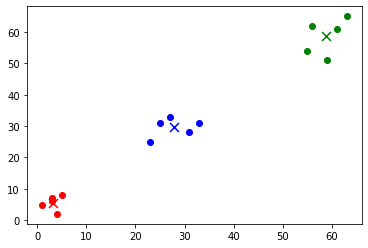

In [63]:
class k_means():
    def __init__(self, data, k):
        self.data = data
        self.k = k
    def ini_centroids(self, data, k):
        lst = []
        data_len = len(self.data)
        choices = np.random.choice(range(data_len), size=self.k, replace=False)
        for i in choices:
            lst.append([self.data[i]])
        #print('centroids = ' + str(lst))
        print([i[0] for i in lst])
        return [i[0] for i in lst]
    def clusters(self,centroids):
        #print('cluster centroids = ' + str(centroids))
        cluster_vals = [[] for i in range(len(centroids))]
        #print(cluster_vals)
        for y in self.data:
            distances = []
            for x in centroids:
                distances.append(np.linalg.norm(y - x))
            print(distances)
            idx = distances.index(min(distances))
            print(idx)
            cluster_vals[idx].append(y)
        print(cluster_vals)               
        return cluster_vals
    def update(self,clust_vals):
        cluster_means = []
        for x in clust_vals:
            cluster_means.append(sum(x[::])/len(x))
            #print('x = ' + str(x))
        #print('means = ' + str(cluster_means))
        return self.clusters(cluster_means)
    #@timer
    def k_means_func(self):
        centroids = self.ini_centroids(self.data, self.k)
        cluster_values = self.clusters(centroids)
        updates = self.update(cluster_values)
        count = 0
        for i in range(len(updates)):
            if not np.array_equal(np.round(updates[i][0],3), np.round(self.update(updates)[i][0],3)):
                count += 1
                updates = self.update(updates)
                #print(updates)
        #print('It took ' + str(count) + ' cycles!')
        return updates
    def k_means_repeat(self):
        clusters = []
        variances = []
        for r in range(10):
            clusters.append(self.k_means_func())
        for x in clusters:
            count = 0
            for i in range(self.k):
                count += np.var(x[i])
                #print(np.var(x[i]))
            #print(count)
            variances.append(count)
        #print(variances)
        return clusters[variances.index(np.min(variances))]
    def plot(self):
        test_plot = self.k_means_func()
        test_array = np.array([np.array(xi) for xi in test_plot],dtype=object)
        #print('test array = ' + str(np.mean(test_array[0][:,0])))
        colors = ['red','green','blue','purple','orange','brown','pink','olive','cyan','gray']
        for i in range(self.k):
            plt.scatter(test_array[i][:,0], test_array[i][:,1], color = colors[i])
            plt.scatter(np.mean(test_array[i][:,0]), np.mean(test_array[i][:,1]), marker='x', s=80, color=colors[i])
        return plt.show()
    def plot_2(self):
        test_plot = self.k_means_repeat()
        #print(test_plot)
        test_array = np.array([np.array(xi) for xi in test_plot],dtype=object)
        #print(test_array)
        colors = ['red','green','blue','purple','orange','brown','pink','olive','cyan','gray']
        for i in range(self.k):
            plt.scatter(test_array[i][:,0], test_array[i][:,1], color = colors[i])
            plt.scatter(np.mean(test_array[i][:,0]), np.mean(test_array[i][:,1]), marker='x', s=80, color=colors[i])
        return plt.show()
        
test = k_means(data, 3)    
#test.k_means_repeat()

test.plot_2()

[array([24.,  0.]), array([25.,  0.]), array([52.,  0.])]
[array([24.,  0.]), array([25.,  0.]), array([52.,  0.])]
[array([24.,  0.]), array([25.,  0.]), array([52.,  0.])]
[array([24.,  0.]), array([25.,  0.]), array([52.,  0.])]
[array([24.,  0.]), array([25.,  0.]), array([52.,  0.])]
[array([24.,  0.]), array([25.,  0.]), array([52.,  0.])]
[array([24.,  0.]), array([25.,  0.]), array([52.,  0.])]
[array([24.,  0.]), array([25.,  0.]), array([52.,  0.])]
[array([24.,  0.]), array([25.,  0.]), array([52.,  0.])]
[array([24.,  0.]), array([25.,  0.]), array([52.,  0.])]
[array([24.,  0.]), array([25.,  0.]), array([52.,  0.])]
[array([24.,  0.]), array([25.,  0.]), array([52.,  0.])]
[array([24.,  0.]), array([25.,  0.]), array([52.,  0.])]
[array([24.,  0.]), array([25.,  0.]), array([52.,  0.])]
[array([24.,  0.]), array([25.,  0.]), array([52.,  0.])]
[[array([1., 0.]), array([5., 0.]), array([3., 0.]), array([2., 0.]), array([6., 0.]), array([24.,  0.])], [array([25.,  0.]), arr

[array([27.,  0.]), array([53.,  0.]), array([62.,  0.])]
[array([27.,  0.]), array([53.,  0.]), array([62.,  0.])]
[array([27.,  0.]), array([53.,  0.]), array([62.,  0.])]
[array([27.,  0.]), array([53.,  0.]), array([62.,  0.])]
[array([27.,  0.]), array([53.,  0.]), array([62.,  0.])]
[array([27.,  0.]), array([53.,  0.]), array([62.,  0.])]
[array([27.,  0.]), array([53.,  0.]), array([62.,  0.])]
[array([27.,  0.]), array([53.,  0.]), array([62.,  0.])]
[array([27.,  0.]), array([53.,  0.]), array([62.,  0.])]
[array([27.,  0.]), array([53.,  0.]), array([62.,  0.])]
[array([27.,  0.]), array([53.,  0.]), array([62.,  0.])]
[array([27.,  0.]), array([53.,  0.]), array([62.,  0.])]
[[array([1., 0.]), array([5., 0.]), array([3., 0.]), array([2., 0.]), array([6., 0.]), array([25.,  0.]), array([26.,  0.]), array([24.,  0.]), array([27.,  0.]), array([28.,  0.])], [array([53.,  0.]), array([52.,  0.]), array([51.,  0.])], [array([64.,  0.]), array([62.,  0.])]]
[array([14.7,  0. ]), 

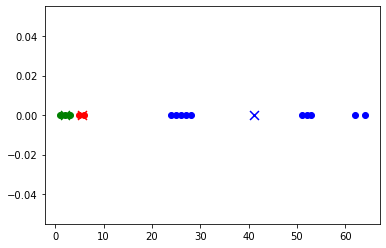

In [4]:
one_d = k_means(stack,3)
one_d.plot_2()

In [5]:
iris = datasets.load_iris()
#iris['data']

In [6]:
iris_k = k_means(iris['data'],3)
iris_k.k_means_repeat()

[array([6.5, 3. , 5.5, 1.8]), array([6.1, 2.9, 4.7, 1.4]), array([5.7, 3. , 4.2, 1.2])]
[array([6.5, 3. , 5.5, 1.8]), array([6.1, 2.9, 4.7, 1.4]), array([5.7, 3. , 4.2, 1.2])]
[array([6.5, 3. , 5.5, 1.8]), array([6.1, 2.9, 4.7, 1.4]), array([5.7, 3. , 4.2, 1.2])]
[array([6.5, 3. , 5.5, 1.8]), array([6.1, 2.9, 4.7, 1.4]), array([5.7, 3. , 4.2, 1.2])]
[array([6.5, 3. , 5.5, 1.8]), array([6.1, 2.9, 4.7, 1.4]), array([5.7, 3. , 4.2, 1.2])]
[array([6.5, 3. , 5.5, 1.8]), array([6.1, 2.9, 4.7, 1.4]), array([5.7, 3. , 4.2, 1.2])]
[array([6.5, 3. , 5.5, 1.8]), array([6.1, 2.9, 4.7, 1.4]), array([5.7, 3. , 4.2, 1.2])]
[array([6.5, 3. , 5.5, 1.8]), array([6.1, 2.9, 4.7, 1.4]), array([5.7, 3. , 4.2, 1.2])]
[array([6.5, 3. , 5.5, 1.8]), array([6.1, 2.9, 4.7, 1.4]), array([5.7, 3. , 4.2, 1.2])]
[array([6.5, 3. , 5.5, 1.8]), array([6.1, 2.9, 4.7, 1.4]), array([5.7, 3. , 4.2, 1.2])]
[array([6.5, 3. , 5.5, 1.8]), array([6.1, 2.9, 4.7, 1.4]), array([5.7, 3. , 4.2, 1.2])]
[array([6.5, 3. , 5.5, 1.8]), ar

[[array([6.3, 3.3, 6. , 2.5]), array([7.1, 3. , 5.9, 2.1]), array([6.3, 2.9, 5.6, 1.8]), array([6.5, 3. , 5.8, 2.2]), array([7.6, 3. , 6.6, 2.1]), array([7.3, 2.9, 6.3, 1.8]), array([6.7, 2.5, 5.8, 1.8]), array([7.2, 3.6, 6.1, 2.5]), array([6.5, 3.2, 5.1, 2. ]), array([6.4, 2.7, 5.3, 1.9]), array([6.8, 3. , 5.5, 2.1]), array([6.4, 3.2, 5.3, 2.3]), array([6.5, 3. , 5.5, 1.8]), array([7.7, 3.8, 6.7, 2.2]), array([7.7, 2.6, 6.9, 2.3]), array([6.9, 3.2, 5.7, 2.3]), array([7.7, 2.8, 6.7, 2. ]), array([6.7, 3.3, 5.7, 2.1]), array([7.2, 3.2, 6. , 1.8]), array([6.4, 2.8, 5.6, 2.1]), array([7.2, 3. , 5.8, 1.6]), array([7.4, 2.8, 6.1, 1.9]), array([7.9, 3.8, 6.4, 2. ]), array([6.4, 2.8, 5.6, 2.2]), array([7.7, 3. , 6.1, 2.3]), array([6.3, 3.4, 5.6, 2.4]), array([6.4, 3.1, 5.5, 1.8]), array([6.9, 3.1, 5.4, 2.1]), array([6.7, 3.1, 5.6, 2.4]), array([6.9, 3.1, 5.1, 2.3]), array([6.8, 3.2, 5.9, 2.3]), array([6.7, 3.3, 5.7, 2.5]), array([6.7, 3. , 5.2, 2.3]), array([6.5, 3. , 5.2, 2. ]), array([6.2, 

[array([6.54583333, 2.96388889, 5.27361111, 1.85      ]), array([5.54814815, 2.64074074, 3.9962963 , 1.23333333]), array([5.00784314, 3.40980392, 1.49215686, 0.2627451 ])]
[array([6.54583333, 2.96388889, 5.27361111, 1.85      ]), array([5.54814815, 2.64074074, 3.9962963 , 1.23333333]), array([5.00784314, 3.40980392, 1.49215686, 0.2627451 ])]
[array([6.54583333, 2.96388889, 5.27361111, 1.85      ]), array([5.54814815, 2.64074074, 3.9962963 , 1.23333333]), array([5.00784314, 3.40980392, 1.49215686, 0.2627451 ])]
[array([6.54583333, 2.96388889, 5.27361111, 1.85      ]), array([5.54814815, 2.64074074, 3.9962963 , 1.23333333]), array([5.00784314, 3.40980392, 1.49215686, 0.2627451 ])]
[array([6.54583333, 2.96388889, 5.27361111, 1.85      ]), array([5.54814815, 2.64074074, 3.9962963 , 1.23333333]), array([5.00784314, 3.40980392, 1.49215686, 0.2627451 ])]
[array([6.54583333, 2.96388889, 5.27361111, 1.85      ]), array([5.54814815, 2.64074074, 3.9962963 , 1.23333333]), array([5.00784314, 3.4098

[array([5.006, 3.428, 1.462, 0.246]), array([6.86923077, 3.08974359, 5.69230769, 2.05641026]), array([5.87377049, 2.73278689, 4.40327869, 1.43278689])]
[array([5.006, 3.428, 1.462, 0.246]), array([6.86923077, 3.08974359, 5.69230769, 2.05641026]), array([5.87377049, 2.73278689, 4.40327869, 1.43278689])]
[array([5.006, 3.428, 1.462, 0.246]), array([6.86923077, 3.08974359, 5.69230769, 2.05641026]), array([5.87377049, 2.73278689, 4.40327869, 1.43278689])]
[array([5.006, 3.428, 1.462, 0.246]), array([6.86923077, 3.08974359, 5.69230769, 2.05641026]), array([5.87377049, 2.73278689, 4.40327869, 1.43278689])]
[array([5.006, 3.428, 1.462, 0.246]), array([6.86923077, 3.08974359, 5.69230769, 2.05641026]), array([5.87377049, 2.73278689, 4.40327869, 1.43278689])]
[array([5.006, 3.428, 1.462, 0.246]), array([6.86923077, 3.08974359, 5.69230769, 2.05641026]), array([5.87377049, 2.73278689, 4.40327869, 1.43278689])]
[array([5.006, 3.428, 1.462, 0.246]), array([6.86923077, 3.08974359, 5.69230769, 2.05641

[array([5.006, 3.428, 1.462, 0.246]), array([6.85384615, 3.07692308, 5.71538462, 2.05384615]), array([5.88360656, 2.74098361, 4.38852459, 1.43442623])]
[array([5.006, 3.428, 1.462, 0.246]), array([6.85384615, 3.07692308, 5.71538462, 2.05384615]), array([5.88360656, 2.74098361, 4.38852459, 1.43442623])]
[array([5.006, 3.428, 1.462, 0.246]), array([6.85384615, 3.07692308, 5.71538462, 2.05384615]), array([5.88360656, 2.74098361, 4.38852459, 1.43442623])]
[array([5.006, 3.428, 1.462, 0.246]), array([6.85384615, 3.07692308, 5.71538462, 2.05384615]), array([5.88360656, 2.74098361, 4.38852459, 1.43442623])]
[array([5.006, 3.428, 1.462, 0.246]), array([6.85384615, 3.07692308, 5.71538462, 2.05384615]), array([5.88360656, 2.74098361, 4.38852459, 1.43442623])]
[array([5.006, 3.428, 1.462, 0.246]), array([6.85384615, 3.07692308, 5.71538462, 2.05384615]), array([5.88360656, 2.74098361, 4.38852459, 1.43442623])]
[array([5.006, 3.428, 1.462, 0.246]), array([6.85384615, 3.07692308, 5.71538462, 2.05384

[array([6.30103093, 2.88659794, 4.95876289, 1.69587629]), array([5.38125, 3.81875, 1.51875, 0.28125]), array([4.84324324, 3.17567568, 1.57837838, 0.29459459])]
[array([6.30103093, 2.88659794, 4.95876289, 1.69587629]), array([5.38125, 3.81875, 1.51875, 0.28125]), array([4.84324324, 3.17567568, 1.57837838, 0.29459459])]
[array([6.30103093, 2.88659794, 4.95876289, 1.69587629]), array([5.38125, 3.81875, 1.51875, 0.28125]), array([4.84324324, 3.17567568, 1.57837838, 0.29459459])]
[array([6.30103093, 2.88659794, 4.95876289, 1.69587629]), array([5.38125, 3.81875, 1.51875, 0.28125]), array([4.84324324, 3.17567568, 1.57837838, 0.29459459])]
[array([6.30103093, 2.88659794, 4.95876289, 1.69587629]), array([5.38125, 3.81875, 1.51875, 0.28125]), array([4.84324324, 3.17567568, 1.57837838, 0.29459459])]
[array([6.30103093, 2.88659794, 4.95876289, 1.69587629]), array([5.38125, 3.81875, 1.51875, 0.28125]), array([4.84324324, 3.17567568, 1.57837838, 0.29459459])]
[array([6.30103093, 2.88659794, 4.958762

[array([5.4, 3. , 4.5, 1.5]), array([4.9, 3.6, 1.4, 0.1]), array([6.9, 3.1, 5.1, 2.3])]
[array([5.4, 3. , 4.5, 1.5]), array([4.9, 3.6, 1.4, 0.1]), array([6.9, 3.1, 5.1, 2.3])]
[array([5.4, 3. , 4.5, 1.5]), array([4.9, 3.6, 1.4, 0.1]), array([6.9, 3.1, 5.1, 2.3])]
[array([5.4, 3. , 4.5, 1.5]), array([4.9, 3.6, 1.4, 0.1]), array([6.9, 3.1, 5.1, 2.3])]
[array([5.4, 3. , 4.5, 1.5]), array([4.9, 3.6, 1.4, 0.1]), array([6.9, 3.1, 5.1, 2.3])]
[array([5.4, 3. , 4.5, 1.5]), array([4.9, 3.6, 1.4, 0.1]), array([6.9, 3.1, 5.1, 2.3])]
[array([5.4, 3. , 4.5, 1.5]), array([4.9, 3.6, 1.4, 0.1]), array([6.9, 3.1, 5.1, 2.3])]
[array([5.4, 3. , 4.5, 1.5]), array([4.9, 3.6, 1.4, 0.1]), array([6.9, 3.1, 5.1, 2.3])]
[array([5.4, 3. , 4.5, 1.5]), array([4.9, 3.6, 1.4, 0.1]), array([6.9, 3.1, 5.1, 2.3])]
[array([5.4, 3. , 4.5, 1.5]), array([4.9, 3.6, 1.4, 0.1]), array([6.9, 3.1, 5.1, 2.3])]
[array([5.4, 3. , 4.5, 1.5]), array([4.9, 3.6, 1.4, 0.1]), array([6.9, 3.1, 5.1, 2.3])]
[array([5.4, 3. , 4.5, 1.5]), ar

[array([5.83928571, 2.73571429, 4.33928571, 1.40714286]), array([5.006, 3.428, 1.462, 0.246]), array([6.8       , 3.04545455, 5.62727273, 2.01818182])]
[array([5.83928571, 2.73571429, 4.33928571, 1.40714286]), array([5.006, 3.428, 1.462, 0.246]), array([6.8       , 3.04545455, 5.62727273, 2.01818182])]
[array([5.83928571, 2.73571429, 4.33928571, 1.40714286]), array([5.006, 3.428, 1.462, 0.246]), array([6.8       , 3.04545455, 5.62727273, 2.01818182])]
[array([5.83928571, 2.73571429, 4.33928571, 1.40714286]), array([5.006, 3.428, 1.462, 0.246]), array([6.8       , 3.04545455, 5.62727273, 2.01818182])]
[array([5.83928571, 2.73571429, 4.33928571, 1.40714286]), array([5.006, 3.428, 1.462, 0.246]), array([6.8       , 3.04545455, 5.62727273, 2.01818182])]
[array([5.83928571, 2.73571429, 4.33928571, 1.40714286]), array([5.006, 3.428, 1.462, 0.246]), array([6.8       , 3.04545455, 5.62727273, 2.01818182])]
[array([5.83928571, 2.73571429, 4.33928571, 1.40714286]), array([5.006, 3.428, 1.462, 0.

[[array([7.6, 3. , 6.6, 2.1]), array([7.3, 2.9, 6.3, 1.8]), array([7.2, 3.6, 6.1, 2.5]), array([7.7, 3.8, 6.7, 2.2]), array([7.7, 2.6, 6.9, 2.3]), array([7.7, 2.8, 6.7, 2. ]), array([7.4, 2.8, 6.1, 1.9]), array([7.9, 3.8, 6.4, 2. ]), array([7.7, 3. , 6.1, 2.3])], [array([5.1, 3.5, 1.4, 0.2]), array([4.9, 3. , 1.4, 0.2]), array([4.7, 3.2, 1.3, 0.2]), array([4.6, 3.1, 1.5, 0.2]), array([5. , 3.6, 1.4, 0.2]), array([5.4, 3.9, 1.7, 0.4]), array([4.6, 3.4, 1.4, 0.3]), array([5. , 3.4, 1.5, 0.2]), array([4.4, 2.9, 1.4, 0.2]), array([4.9, 3.1, 1.5, 0.1]), array([5.4, 3.7, 1.5, 0.2]), array([4.8, 3.4, 1.6, 0.2]), array([4.8, 3. , 1.4, 0.1]), array([4.3, 3. , 1.1, 0.1]), array([5.8, 4. , 1.2, 0.2]), array([5.7, 4.4, 1.5, 0.4]), array([5.4, 3.9, 1.3, 0.4]), array([5.1, 3.5, 1.4, 0.3]), array([5.7, 3.8, 1.7, 0.3]), array([5.1, 3.8, 1.5, 0.3]), array([5.4, 3.4, 1.7, 0.2]), array([5.1, 3.7, 1.5, 0.4]), array([4.6, 3.6, 1. , 0.2]), array([5.1, 3.3, 1.7, 0.5]), array([4.8, 3.4, 1.9, 0.2]), array([5. 

[array([7.275  , 3.15625, 6.18125, 2.1375 ]), array([5.00566038, 3.36981132, 1.56037736, 0.29056604]), array([6.10864198, 2.83333333, 4.71728395, 1.60864198])]
[array([7.275  , 3.15625, 6.18125, 2.1375 ]), array([5.00566038, 3.36981132, 1.56037736, 0.29056604]), array([6.10864198, 2.83333333, 4.71728395, 1.60864198])]
[array([7.275  , 3.15625, 6.18125, 2.1375 ]), array([5.00566038, 3.36981132, 1.56037736, 0.29056604]), array([6.10864198, 2.83333333, 4.71728395, 1.60864198])]
[array([7.275  , 3.15625, 6.18125, 2.1375 ]), array([5.00566038, 3.36981132, 1.56037736, 0.29056604]), array([6.10864198, 2.83333333, 4.71728395, 1.60864198])]
[array([7.275  , 3.15625, 6.18125, 2.1375 ]), array([5.00566038, 3.36981132, 1.56037736, 0.29056604]), array([6.10864198, 2.83333333, 4.71728395, 1.60864198])]
[array([7.275  , 3.15625, 6.18125, 2.1375 ]), array([5.00566038, 3.36981132, 1.56037736, 0.29056604]), array([6.10864198, 2.83333333, 4.71728395, 1.60864198])]
[array([7.275  , 3.15625, 6.18125, 2.137

[array([5.006, 3.428, 1.462, 0.246]), array([6.6015873 , 2.98571429, 5.38412698, 1.91587302]), array([5.68378378, 2.67837838, 4.09189189, 1.26756757])]
[array([5.006, 3.428, 1.462, 0.246]), array([6.6015873 , 2.98571429, 5.38412698, 1.91587302]), array([5.68378378, 2.67837838, 4.09189189, 1.26756757])]
[array([5.006, 3.428, 1.462, 0.246]), array([6.6015873 , 2.98571429, 5.38412698, 1.91587302]), array([5.68378378, 2.67837838, 4.09189189, 1.26756757])]
[array([5.006, 3.428, 1.462, 0.246]), array([6.6015873 , 2.98571429, 5.38412698, 1.91587302]), array([5.68378378, 2.67837838, 4.09189189, 1.26756757])]
[array([5.006, 3.428, 1.462, 0.246]), array([6.6015873 , 2.98571429, 5.38412698, 1.91587302]), array([5.68378378, 2.67837838, 4.09189189, 1.26756757])]
[array([5.006, 3.428, 1.462, 0.246]), array([6.6015873 , 2.98571429, 5.38412698, 1.91587302]), array([5.68378378, 2.67837838, 4.09189189, 1.26756757])]
[array([5.006, 3.428, 1.462, 0.246]), array([6.6015873 , 2.98571429, 5.38412698, 1.91587

[array([5.20645161, 3.63870968, 1.51290323, 0.27419355]), array([6.262, 2.872, 4.906, 1.676]), array([4.67894737, 3.08421053, 1.37894737, 0.2       ])]
[array([5.20645161, 3.63870968, 1.51290323, 0.27419355]), array([6.262, 2.872, 4.906, 1.676]), array([4.67894737, 3.08421053, 1.37894737, 0.2       ])]
[array([5.20645161, 3.63870968, 1.51290323, 0.27419355]), array([6.262, 2.872, 4.906, 1.676]), array([4.67894737, 3.08421053, 1.37894737, 0.2       ])]
[array([5.20645161, 3.63870968, 1.51290323, 0.27419355]), array([6.262, 2.872, 4.906, 1.676]), array([4.67894737, 3.08421053, 1.37894737, 0.2       ])]
[array([5.20645161, 3.63870968, 1.51290323, 0.27419355]), array([6.262, 2.872, 4.906, 1.676]), array([4.67894737, 3.08421053, 1.37894737, 0.2       ])]
[array([5.20645161, 3.63870968, 1.51290323, 0.27419355]), array([6.262, 2.872, 4.906, 1.676]), array([4.67894737, 3.08421053, 1.37894737, 0.2       ])]
[array([5.20645161, 3.63870968, 1.51290323, 0.27419355]), array([6.262, 2.872, 4.906, 1.

[array([5.22758621, 3.65862069, 1.5137931 , 0.27931034]), array([6.2877551 , 2.88061224, 4.94183673, 1.68877551]), array([4.72608696, 3.05217391, 1.54347826, 0.27391304])]
[array([5.22758621, 3.65862069, 1.5137931 , 0.27931034]), array([6.2877551 , 2.88061224, 4.94183673, 1.68877551]), array([4.72608696, 3.05217391, 1.54347826, 0.27391304])]
[array([5.22758621, 3.65862069, 1.5137931 , 0.27931034]), array([6.2877551 , 2.88061224, 4.94183673, 1.68877551]), array([4.72608696, 3.05217391, 1.54347826, 0.27391304])]
[array([5.22758621, 3.65862069, 1.5137931 , 0.27931034]), array([6.2877551 , 2.88061224, 4.94183673, 1.68877551]), array([4.72608696, 3.05217391, 1.54347826, 0.27391304])]
[array([5.22758621, 3.65862069, 1.5137931 , 0.27931034]), array([6.2877551 , 2.88061224, 4.94183673, 1.68877551]), array([4.72608696, 3.05217391, 1.54347826, 0.27391304])]
[array([5.22758621, 3.65862069, 1.5137931 , 0.27931034]), array([6.2877551 , 2.88061224, 4.94183673, 1.68877551]), array([4.72608696, 3.0521

[array([5.00833333, 3.625     , 1.4125    , 0.24583333]), array([6.30103093, 2.88659794, 4.95876289, 1.69587629]), array([5.00344828, 3.15862069, 1.68275862, 0.32758621])]
[array([5.00833333, 3.625     , 1.4125    , 0.24583333]), array([6.30103093, 2.88659794, 4.95876289, 1.69587629]), array([5.00344828, 3.15862069, 1.68275862, 0.32758621])]
[array([5.00833333, 3.625     , 1.4125    , 0.24583333]), array([6.30103093, 2.88659794, 4.95876289, 1.69587629]), array([5.00344828, 3.15862069, 1.68275862, 0.32758621])]
[array([5.00833333, 3.625     , 1.4125    , 0.24583333]), array([6.30103093, 2.88659794, 4.95876289, 1.69587629]), array([5.00344828, 3.15862069, 1.68275862, 0.32758621])]
[array([5.00833333, 3.625     , 1.4125    , 0.24583333]), array([6.30103093, 2.88659794, 4.95876289, 1.69587629]), array([5.00344828, 3.15862069, 1.68275862, 0.32758621])]
[array([5.00833333, 3.625     , 1.4125    , 0.24583333]), array([6.30103093, 2.88659794, 4.95876289, 1.69587629]), array([5.00344828, 3.1586

[array([6.53287671, 2.96438356, 5.2630137 , 1.84520548]), array([5.52962963, 2.62222222, 3.94074074, 1.21851852]), array([5.006, 3.428, 1.462, 0.246])]
[array([6.53287671, 2.96438356, 5.2630137 , 1.84520548]), array([5.52962963, 2.62222222, 3.94074074, 1.21851852]), array([5.006, 3.428, 1.462, 0.246])]
[array([6.53287671, 2.96438356, 5.2630137 , 1.84520548]), array([5.52962963, 2.62222222, 3.94074074, 1.21851852]), array([5.006, 3.428, 1.462, 0.246])]
[array([6.53287671, 2.96438356, 5.2630137 , 1.84520548]), array([5.52962963, 2.62222222, 3.94074074, 1.21851852]), array([5.006, 3.428, 1.462, 0.246])]
[array([6.53287671, 2.96438356, 5.2630137 , 1.84520548]), array([5.52962963, 2.62222222, 3.94074074, 1.21851852]), array([5.006, 3.428, 1.462, 0.246])]
[array([6.53287671, 2.96438356, 5.2630137 , 1.84520548]), array([5.52962963, 2.62222222, 3.94074074, 1.21851852]), array([5.006, 3.428, 1.462, 0.246])]
[array([6.53287671, 2.96438356, 5.2630137 , 1.84520548]), array([5.52962963, 2.62222222,

[[array([7. , 3.2, 4.7, 1.4]),
  array([6.4, 3.2, 4.5, 1.5]),
  array([6.9, 3.1, 4.9, 1.5]),
  array([6.5, 2.8, 4.6, 1.5]),
  array([6.3, 3.3, 4.7, 1.6]),
  array([6.6, 2.9, 4.6, 1.3]),
  array([6.1, 2.9, 4.7, 1.4]),
  array([6.7, 3.1, 4.4, 1.4]),
  array([6.2, 2.2, 4.5, 1.5]),
  array([5.9, 3.2, 4.8, 1.8]),
  array([6.3, 2.5, 4.9, 1.5]),
  array([6.1, 2.8, 4.7, 1.2]),
  array([6.4, 2.9, 4.3, 1.3]),
  array([6.6, 3. , 4.4, 1.4]),
  array([6.8, 2.8, 4.8, 1.4]),
  array([6.7, 3. , 5. , 1.7]),
  array([6. , 2.9, 4.5, 1.5]),
  array([6. , 2.7, 5.1, 1.6]),
  array([6. , 3.4, 4.5, 1.6]),
  array([6.7, 3.1, 4.7, 1.5]),
  array([6.3, 2.3, 4.4, 1.3]),
  array([6.1, 3. , 4.6, 1.4]),
  array([6.2, 2.9, 4.3, 1.3]),
  array([6.3, 3.3, 6. , 2.5]),
  array([5.8, 2.7, 5.1, 1.9]),
  array([7.1, 3. , 5.9, 2.1]),
  array([6.3, 2.9, 5.6, 1.8]),
  array([6.5, 3. , 5.8, 2.2]),
  array([7.6, 3. , 6.6, 2.1]),
  array([7.3, 2.9, 6.3, 1.8]),
  array([6.7, 2.5, 5.8, 1.8]),
  array([7.2, 3.6, 6.1, 2.5]),
  array(